<a href="https://colab.research.google.com/github/thesalmonification/DSCI400_Revamp/blob/master/JoshTestCNNforEEGBasedOnDuncanModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

In [0]:
#Written in Google Colab: add drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#Load in the data...
data_tensor = np.load('/content/drive/Shared drives/DSCI400_Revamp/data_tensor_1D.npy')
label_array = np.load('/content/drive/Shared drives/DSCI400_Revamp/label_array_1D.npy')

print(data_tensor.shape)
print(label_array.shape)

(16224, 6080, 1)
(16224,)


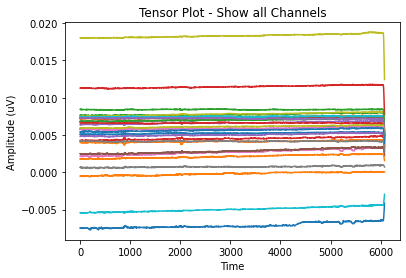

In [0]:
#Just plot the first 31 values to verify I created the data_tensor correctly
for elem in range(0,32):
  channel = data_tensor[elem,:,0]
  plt.plot(channel)
  plt.title('Tensor Plot - Show all Channels')
  plt.xlabel('Time')
  plt.ylabel('Amplitude (uV)')
plt.show()

In [0]:
#Separate into test/train
X_train, X_test, y_train, y_test = train_test_split(data_tensor, label_array, test_size=0.3)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(11356, 6080, 1)
(11356,)
(4868, 6080, 1)
(4868,)


In [0]:
#Make a Keras Model and see what happens...

model = tf.keras.Sequential()

model.add(tf.keras.layers.Convolution1D(32,3,input_shape=(6080,1))) 
#model.add(tf.keras.layers.Activation('tanh'))
model.add(tf.keras.layers.Convolution1D(64,3))
#model.add(tf.keras.layers.Activation('elu'))
#model.add(tf.keras.layers.GlobalMaxPooling1D()) #changed from MaxPool to global
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(12))
model.add(tf.keras.layers.Activation('tanh'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

sgd = tf.keras.optimizers.Adam(lr = 0.001, decay = 1e-6)
#Let's try varying learning rate and make a plot that that shows L2 vs. lr etc.
model.compile(loss='mse',optimizer=sgd,metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 6078, 32)          128       
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 6076, 64)          6208      
_________________________________________________________________
dropout_4 (Dropout)          (None, 6076, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 388864)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 12)                4666380   
_________________________________________________________________
activation_2 (Activation)    (None, 12)                0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 12)               

In [0]:
EPOCHS=20
BATCH_SIZE=32

model.fit(X_train,y_train,epochs=EPOCHS,batch_size=BATCH_SIZE, verbose=1)

Epoch 1/20
355/355 [==============================] - 7s 20ms/step - loss: 0.2568 - accuracy: 0.5586
Epoch 2/20
355/355 [==============================] - 7s 20ms/step - loss: 0.2536 - accuracy: 0.5667
Epoch 3/20
355/355 [==============================] - 7s 20ms/step - loss: 0.2479 - accuracy: 0.5741
Epoch 4/20
355/355 [==============================] - 7s 20ms/step - loss: 0.2442 - accuracy: 0.5859
Epoch 5/20
355/355 [==============================] - 7s 20ms/step - loss: 0.2423 - accuracy: 0.5962
Epoch 6/20
355/355 [==============================] - 7s 20ms/step - loss: 0.2420 - accuracy: 0.5991
Epoch 7/20
355/355 [==============================] - 7s 20ms/step - loss: 0.2412 - accuracy: 0.6004
Epoch 8/20
355/355 [==============================] - 7s 20ms/step - loss: 0.2406 - accuracy: 0.6007
Epoch 9/20
355/355 [==============================] - 7s 20ms/step - loss: 0.2403 - accuracy: 0.6007
Epoch 10/20
355/355 [==============================] - 7s 20ms/step - loss: 0.2401 - accura

In [0]:
test_loss, test_acc = model.evaluate(X_test,y_test)

153/153 [==============================] - 1s 7ms/step - loss: 0.2370 - accuracy: 0.6167


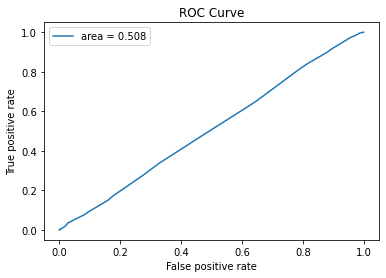

In [0]:
from sklearn.metrics import roc_curve, auc

y_pred = model.predict(X_test).ravel()

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label = 'area = {:.3f}'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()